<a id=0></a>
# 8.Numeric Features
※　数値型特徴量の取り扱い

---
### [1. スケーリング](#1)
### [2. 非線形変換](#2)
### [3.離散化（ビニング）](#3)
---

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="talk", style="darkgrid", font="MS GOTHIC")

---
<a id=1></a>
[Topへ](#0)

---
## 1. スケーリング

* スケーリングの目的
* 代表的な4つのスケーラー
* サンプルアレイの作成
* StandardScaler
* MinMaxScaler
* MaxAbsScaler
* RobustScaler
---

スケーリングの目的

In [22]:
x = np.array([1, 1, 2])
y = np.array([1, 4, 1])
X = x * 1000

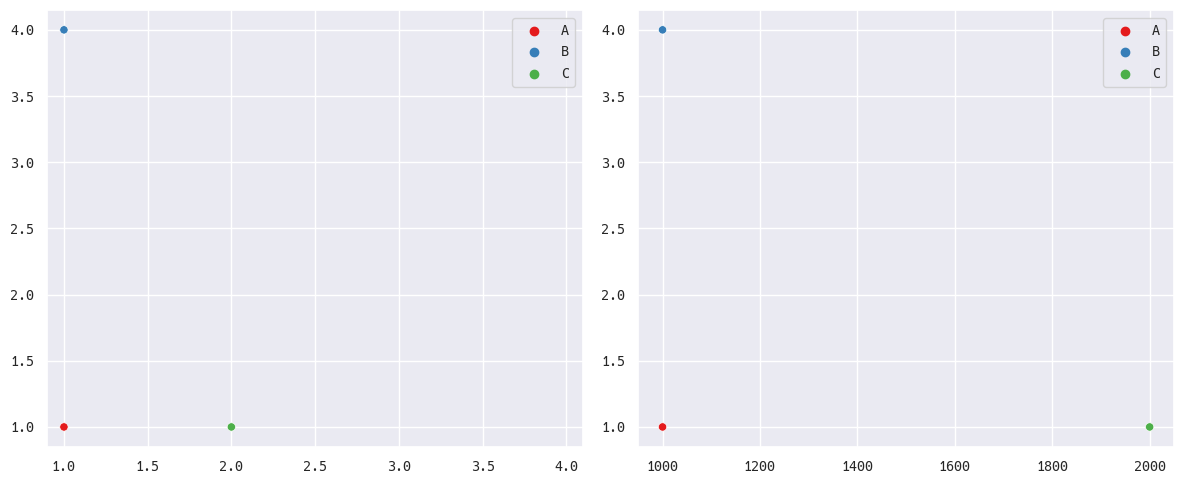

In [23]:
sns.set_theme(font="HackGen")
fig, axes = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
sns.scatterplot(x=x, y=y, ax=axes[0], hue=["A", "B", "C"], palette="Set1")
axes[0].set_xlim(0.9, 4.1)
sns.scatterplot(x=X, y=y, ax=axes[1], hue=["A", "B", "C"], palette="Set1")
plt.show()
# AB、ACの距離（ユークリッド距離）が変わり、CよりもBが近くなっている
# スケールの差があるため、y軸方向の距離の差の重要度が下がってしまう

代表的な4つのスケーラー

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [25]:
sts = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
ros = RobustScaler()

サンプルアレイの作成

In [26]:
# 1のみを持つ配列を作る
np.ones((10, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [27]:
np.random.seed(17)
random_arr = np.random.randn(300, 1)
random_arr.min(), random_arr.max()

(-3.3999307792224305, 3.3451573949029427)

In [28]:
# 1にrandom_arrを掛け、同じ3つの値を持つ300行の配列を作成
# さらに1,100,100を掛けてスケールを変更
# さらに3列目には外れ値を持たせる
X = np.ones((300, 3)) * random_arr * [1, 100, 100] + 111
X[:5]

array([[111.27626589, 138.626589  , 138.626589  ],
       [109.14537192, -74.46280788, -74.46280788],
       [111.62390111, 173.39011113, 173.39011113],
       [112.14531129, 225.53112896, 225.53112896],
       [112.03719047, 214.71904682, 214.71904682]])

In [29]:
np.random.seed(17)
# indexをランダムに抽出
random_index = np.random.randint(0, 300, 10)
for i in random_index:
    X[i, 2] = X[i, 2] * 10  # 10倍することで外れ値を作る

X[random_index]

array([[ 110.55387751,   66.38775061,  663.87750613],
       [ 110.45540322,   56.54032179,  565.4032179 ],
       [ 112.61211545,  272.21154502, 2722.1154502 ],
       [ 112.87760524,  298.76052405, 2987.60524054],
       [ 110.81209843,   92.2098425 ,  922.09842501],
       [ 110.86141475,   97.14147502,  971.41475016],
       [ 108.96400521,  -92.59947911, -925.99479107],
       [ 110.63789866,   74.78986616,  747.8986616 ],
       [ 111.00829246,  111.82924586, 1118.29245864],
       [ 110.52655195,   63.65519529,  636.55195293]])

In [30]:
X[:, 2].min(), X[:, 2].max()
# 2列目は-339+111～334+111。3列目に外れ値を作ることができた

(-925.9947910720698, 2987.605240540157)

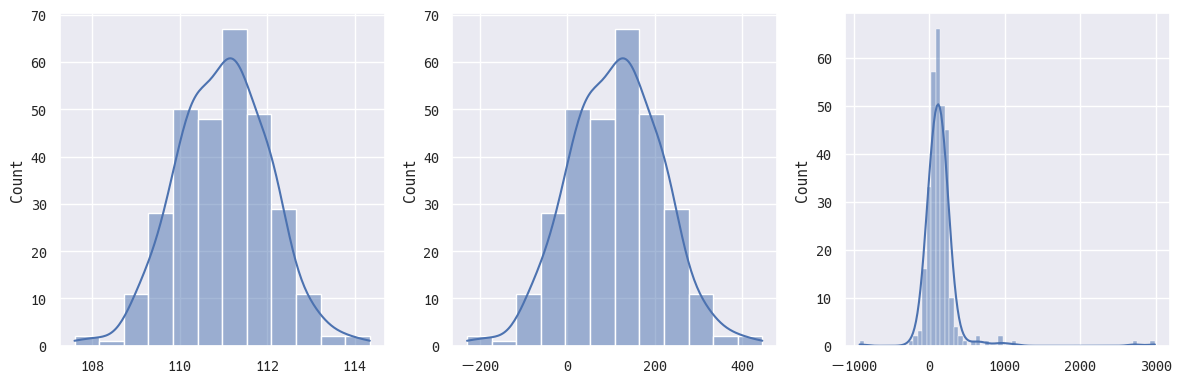

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 0], ax=axes[0], bins=12, kde=True)
sns.histplot(x=X[:, 1], ax=axes[1], bins=12, kde=True)
sns.histplot(x=X[:, 2], ax=axes[2], bins=66, kde=True)
plt.show()

StandardScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
+ 標準化
+ X = (x - 平均値) / 標準偏差
+ 平均0、標準偏差1の分布になるようスケーリング

In [32]:
X[:, 1].reshape(-1, 1).shape

(300, 1)

In [33]:
# sts.fit_transform(X[:, 1].reshape(-1 ,1))
# 二次元配列を引数として指定する必要がある

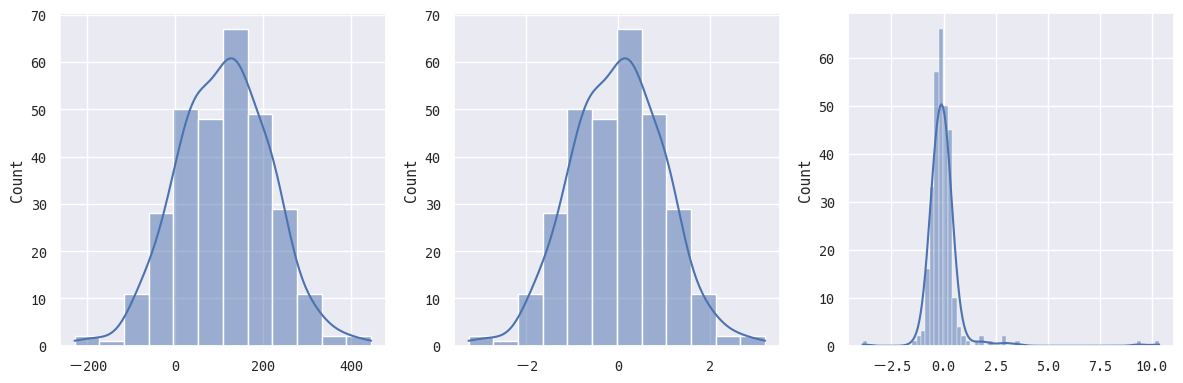

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], ax=axes[0], bins=12, kde=True)
sns.histplot(
    x=sts.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True
)
sns.histplot(
    x=sts.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), ax=axes[2], bins=66, kde=True
)
plt.show()
# ほぼスケーリングの際にはこのスケーラーを選択する
# 外れ値に対してもMinMaxスケーラーほどの影響も受けにくい

MinMaxScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

* 正規化
* X = (x - 最小値) / (最大値 - 最小値)
* 最小0、最大1の分布になるようスケーリング

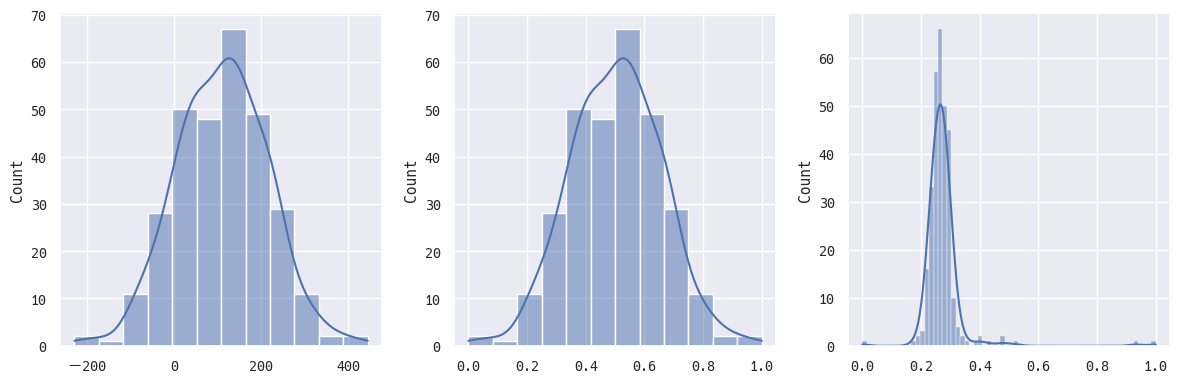

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], ax=axes[0], bins=12, kde=True)
sns.histplot(
    x=mms.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True
)
sns.histplot(
    x=mms.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), ax=axes[2], bins=66, kde=True
)
plt.show()
# 上限、下限のはっきりしたデータに対して使う、とされている

MaxAbsScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html

* X = x / 最大絶対値
* X = x / maxabs
* -1～1の分布になるようスケーリング（少なくとも-1もしくは1の値を持つ）

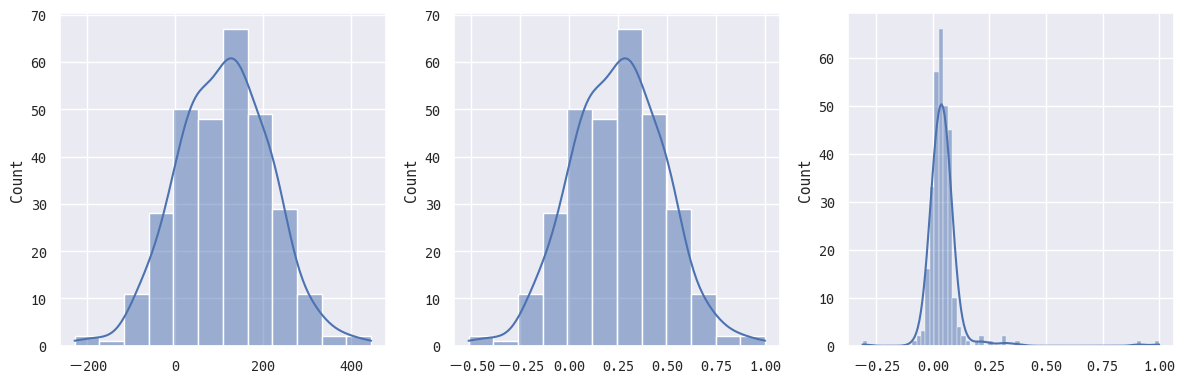

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], ax=axes[0], bins=12, kde=True)
sns.histplot(
    x=mas.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True
)
sns.histplot(
    x=mas.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), ax=axes[2], bins=66, kde=True
)
plt.show()
# 現状では（本コース内では）使う場面はありません

RobustScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html  

* X = (x - 中央値) / 四分位範囲
* X = (x - med) / IQR
* 中央値0、外れ値を除く大部分を対象にスケーリング

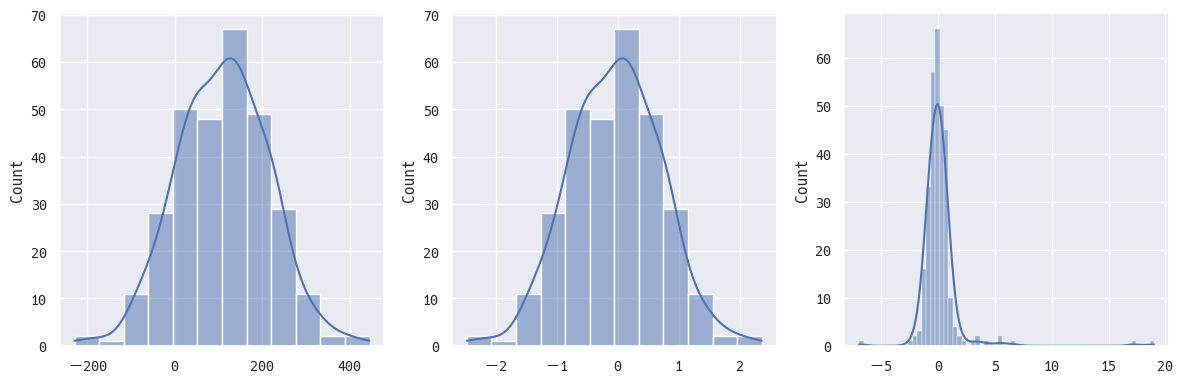

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], ax=axes[0], bins=12, kde=True)
sns.histplot(
    x=ros.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True
)
sns.histplot(
    x=ros.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), ax=axes[2], bins=66, kde=True
)
plt.show()
# データの大部分の収まる範囲は-2～2と変化していない。つまりスケーリングに関して、外れ値の影響をほとんど受けていない。

---
<a id=2></a>
[Topへ](#0)

---
## 2. 非線形変換

* ボストン住宅価格データセット
  - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
  - Quinlan, R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
* QuantileTransformer  
    n_quantiles=1000, output_distribution='uniform'('normal')  
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html  
  PowerTransformer  
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

In [ ]:
# Toy datasetsのひとつ
# https://scikit-learn.org/stable/datasets/toy_dataset.html
from sklearn.datasets import load_boston

boston = load_boston()
# data, target, filename, DESCR, feature_names

# scikit-learnのバージョンにより上記のデータセットが使用できない場合があります
# その場合は下のセル内のコメントアウトを外し実行して学習をお進めください

# 使用不可の理由には特徴量のひとつが不適切であることが挙げられています
# https://scikit-learn.org/1.1/modules/generated/sklearn.datasets.load_boston.html
# ここでは特徴量の意味には触れず、プロット用のデータとして利用するのみです
# 学習用としてはこれまで通り使用可能となっておりますのでご安心ください

In [39]:
# 上記のload_bostonが使用できない場合は以下を実行し、学習をお進めください

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(data, columns=feature_names)

In [ ]:
# print(boston.DESCR)

In [ ]:
# df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
# df.head()

QuantileTransformer / PowerTransformer

In [43]:
# 分位数
np.quantile(df["RM"], [0, 0.25, 0.5, 0.95, 1])

array([3.561 , 5.8855, 6.2085, 7.5875, 8.78  ])

In [44]:
# パーセント
np.percentile(df["RM"], [0, 25, 50, 95, 100])

array([3.561 , 5.8855, 6.2085, 7.5875, 8.78  ])

In [45]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

qut_n = QuantileTransformer(output_distribution="normal", n_quantiles=506)
qut_u = QuantileTransformer(output_distribution="uniform", n_quantiles=506)
pot = PowerTransformer()
# n_quantiles=1000がデフォルト。それより小さい場合はn_quantilesを指定

In [46]:
def plots_transformed(feature):
    # 変換したアレイ
    qut_n_arr = qut_n.fit_transform(df[[feature]]).flatten()
    qut_u_arr = qut_u.fit_transform(df[[feature]]).flatten()
    pot_arr = pot.fit_transform(df[[feature]]).flatten()
    # プロット
    fig, axes = plt.subplots(1, 4, figsize=(18, 5), tight_layout=True)
    sns.histplot(x=df[feature], kde=True, bins=12, ax=axes[0], shrink=0.9)
    axes[0].set_title(feature)
    axes[0].set_xlabel("")

    sns.histplot(x=qut_n_arr, kde=True, bins=12, ax=axes[1], shrink=0.9)
    axes[1].set_title("Quantile_normal")

    sns.histplot(x=qut_u_arr, kde=True, bins=12, ax=axes[2], shrink=0.9)
    axes[2].set_title("Quantile_uniform")

    sns.histplot(x=pot_arr, kde=True, bins=12, ax=axes[3], shrink=0.9)
    axes[3].set_title("Power")

    plt.show()

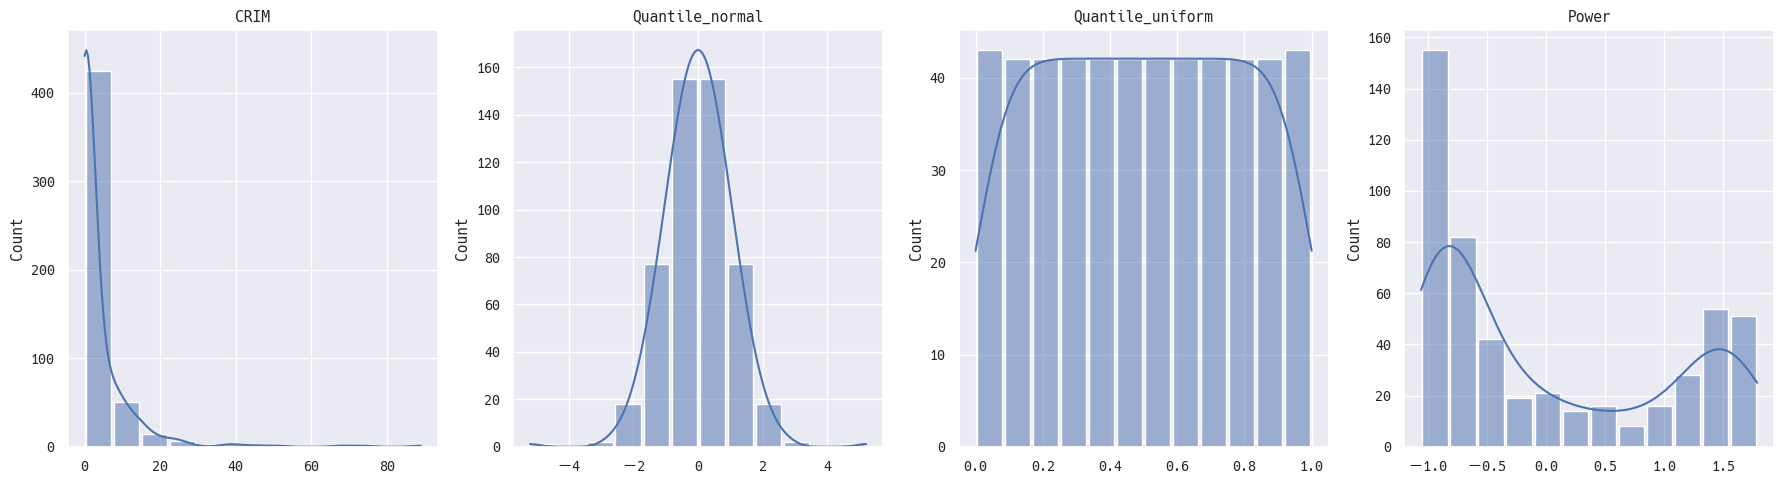

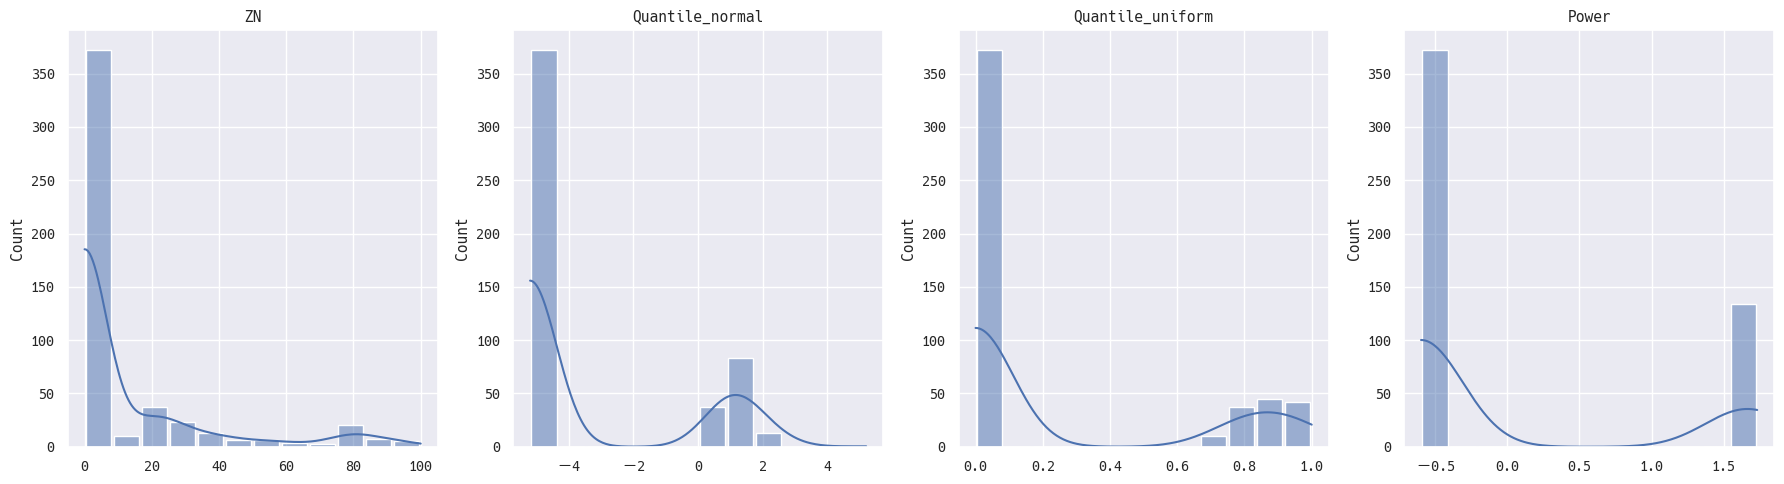

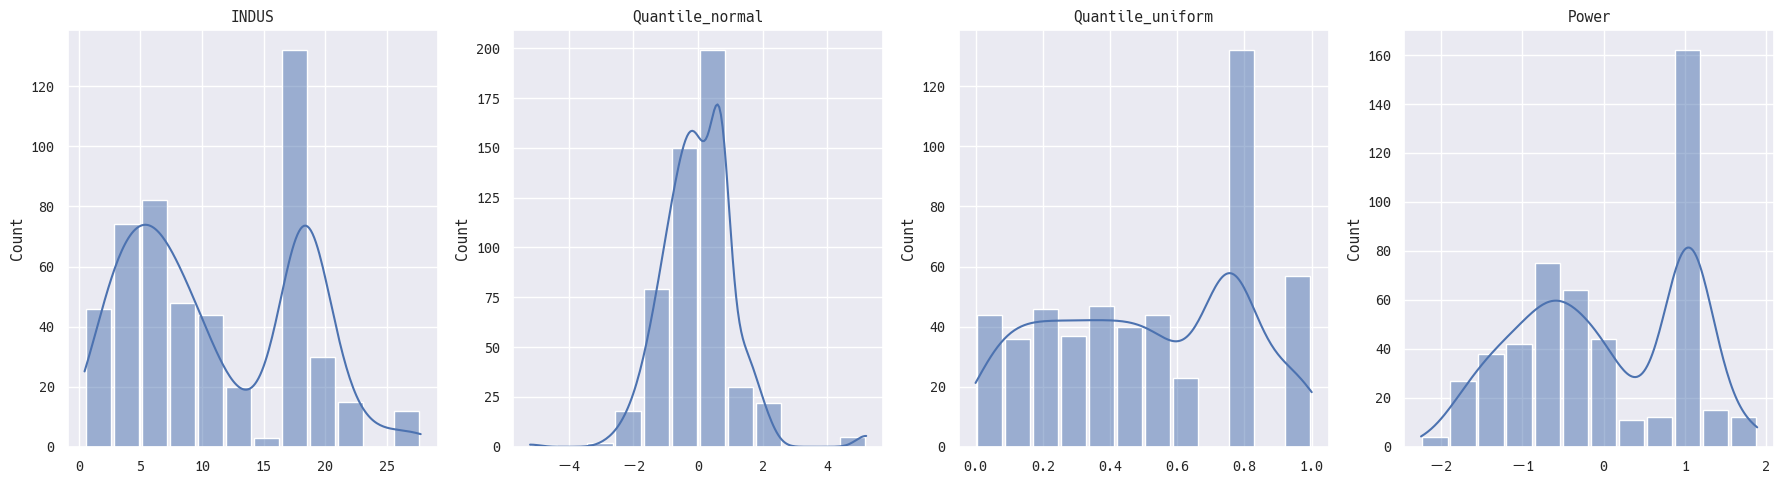

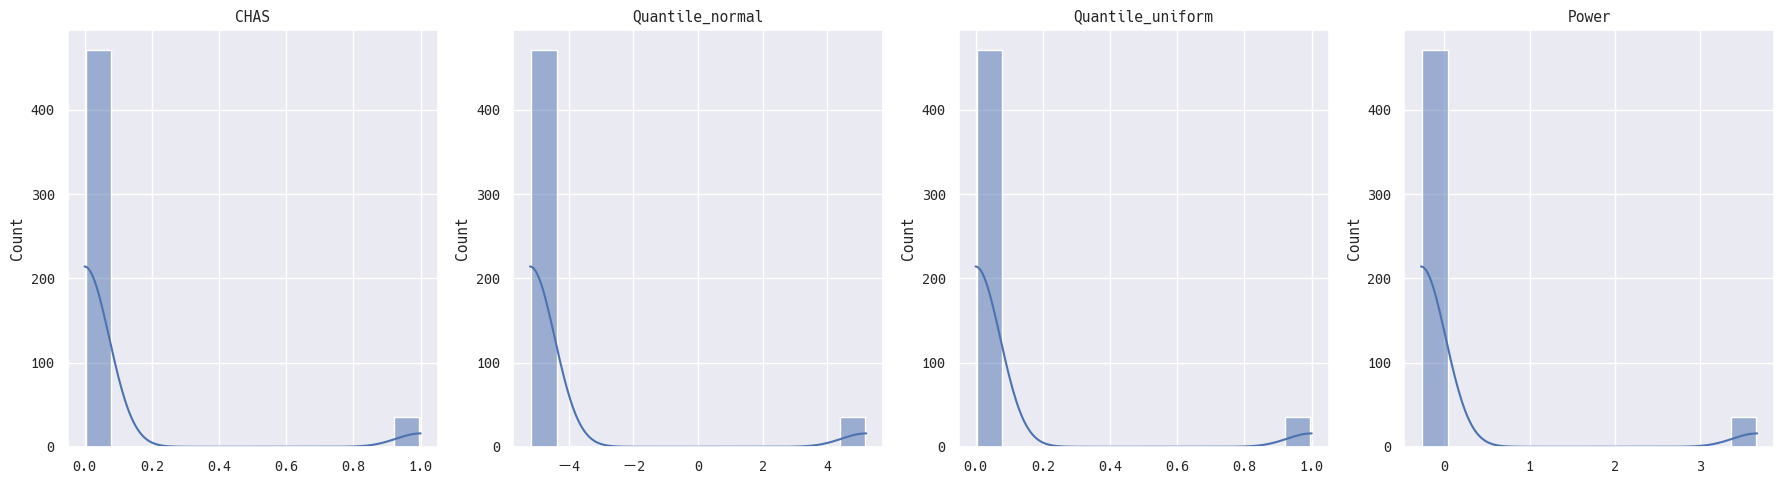

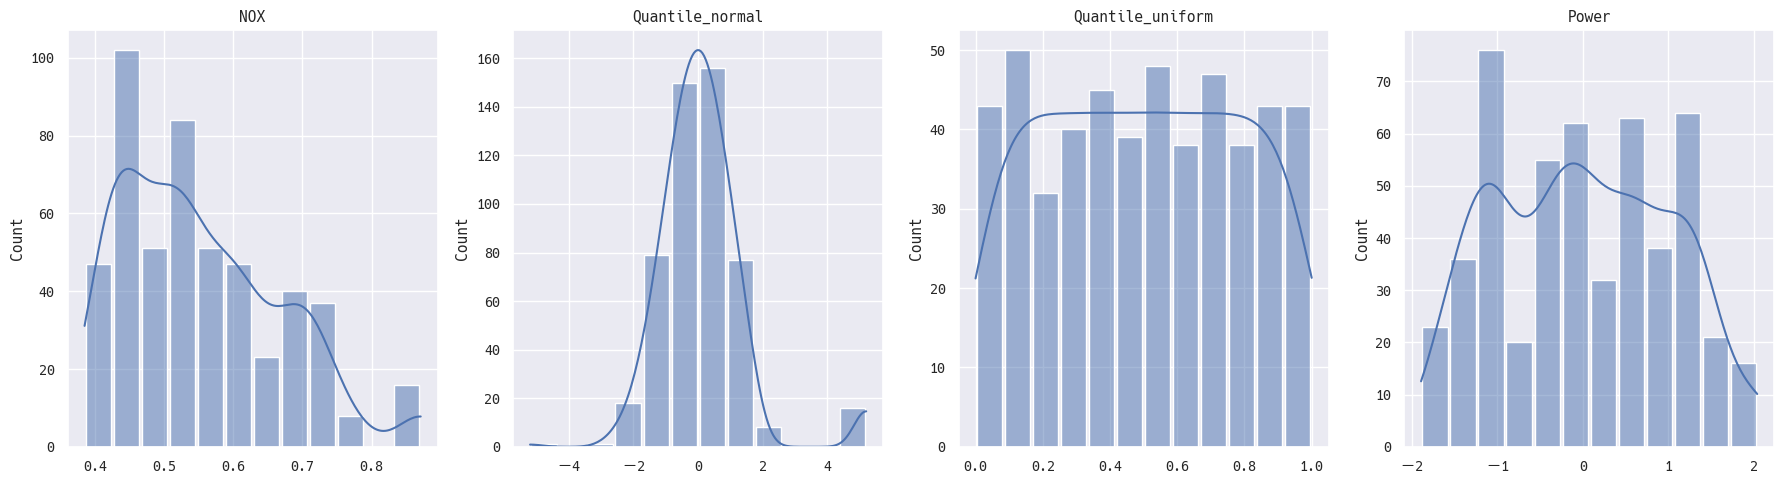

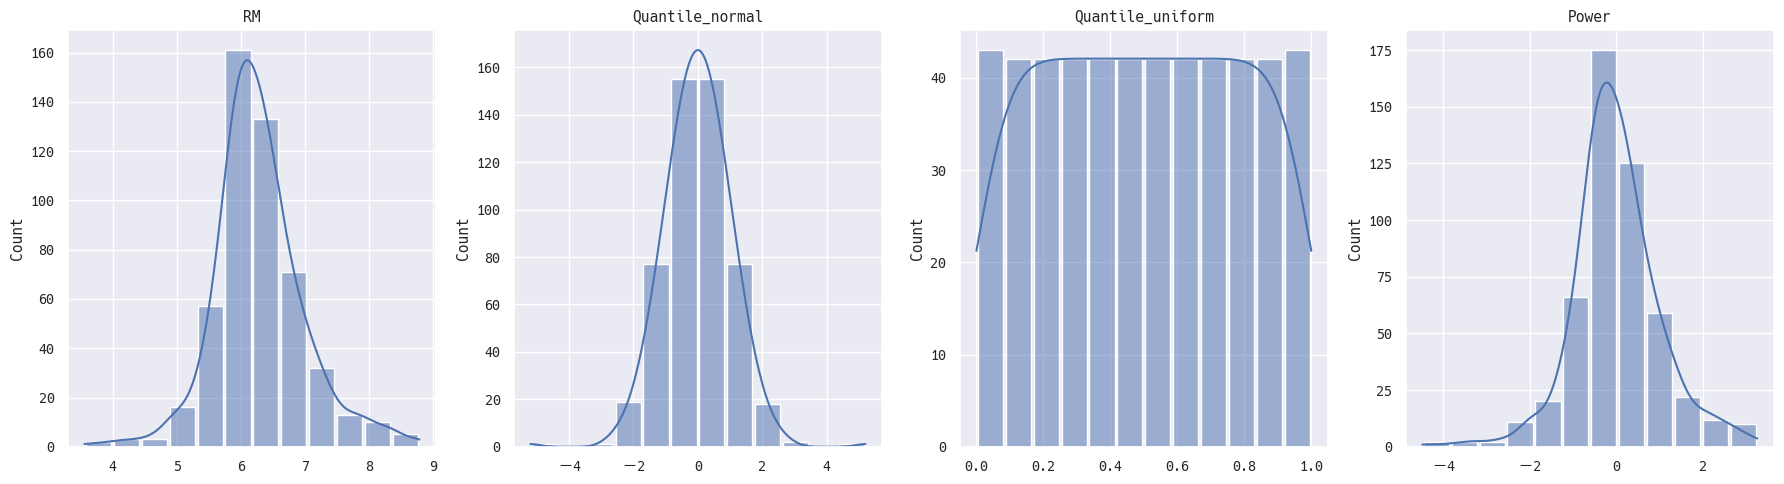

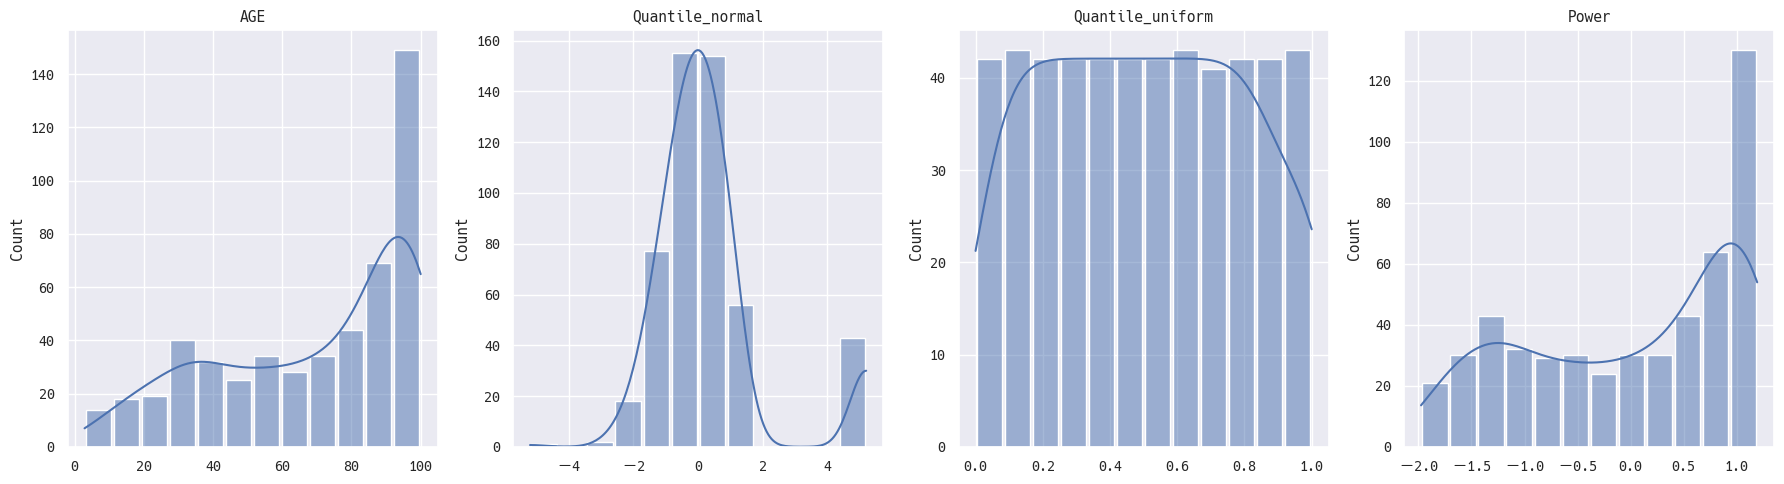

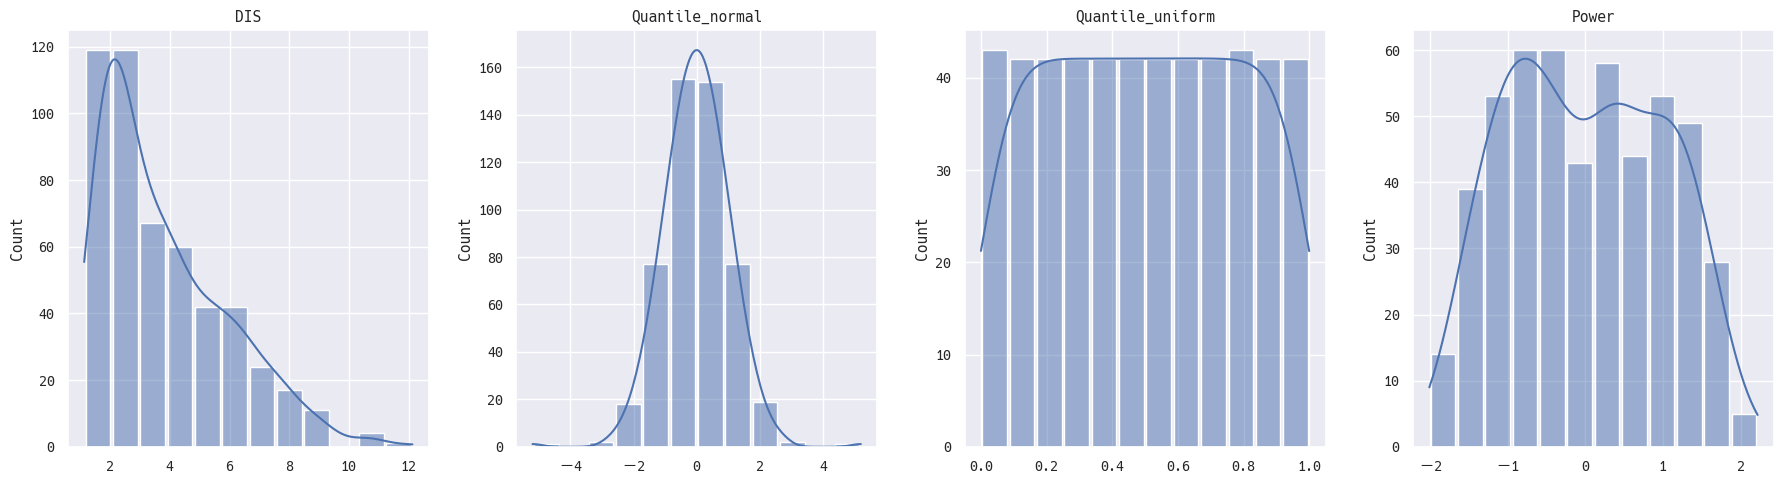

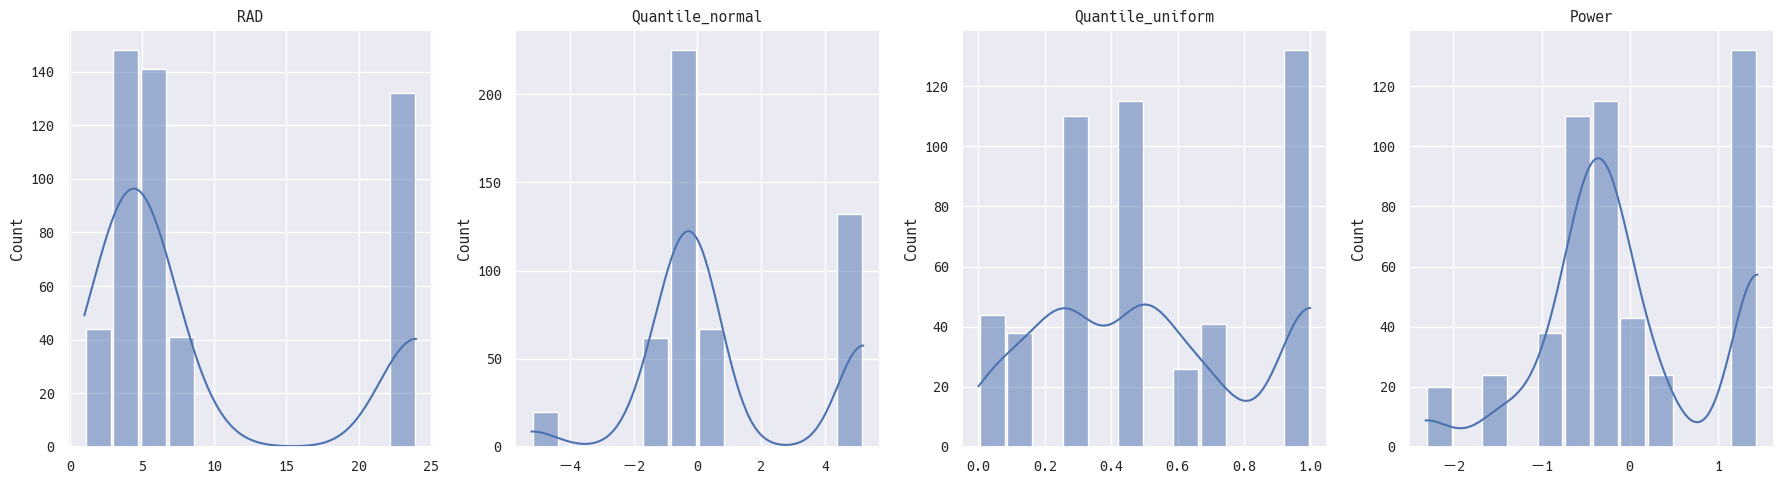

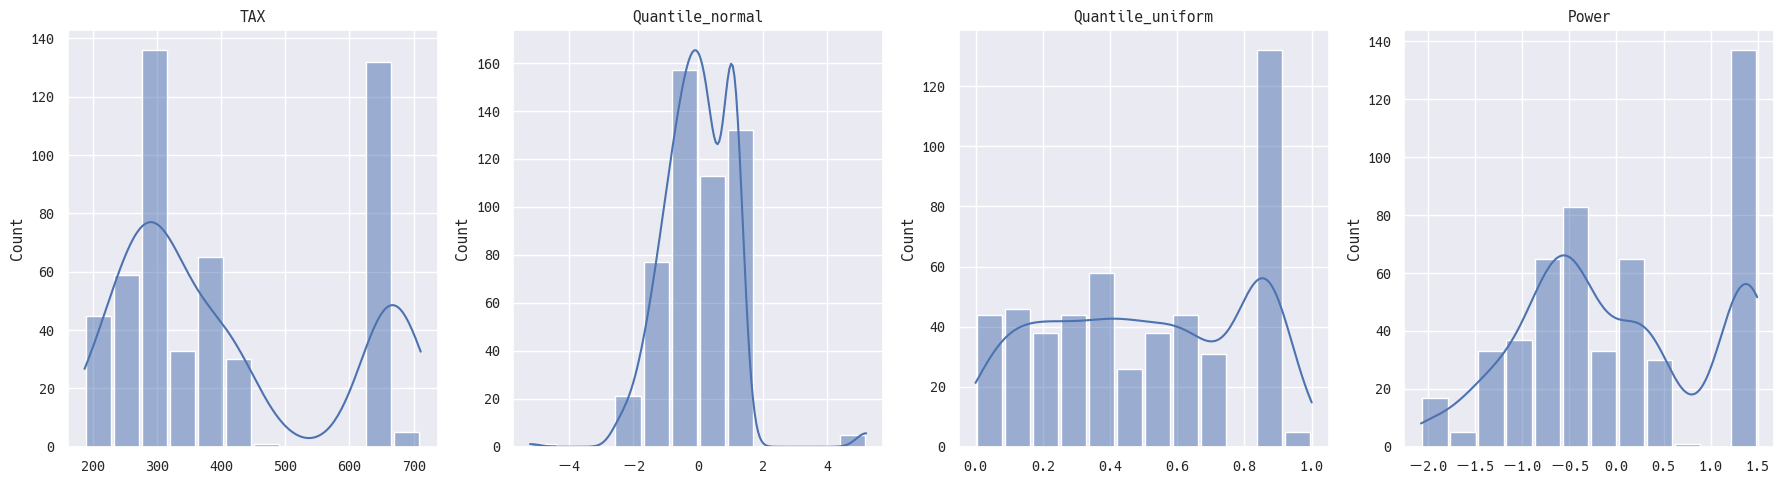

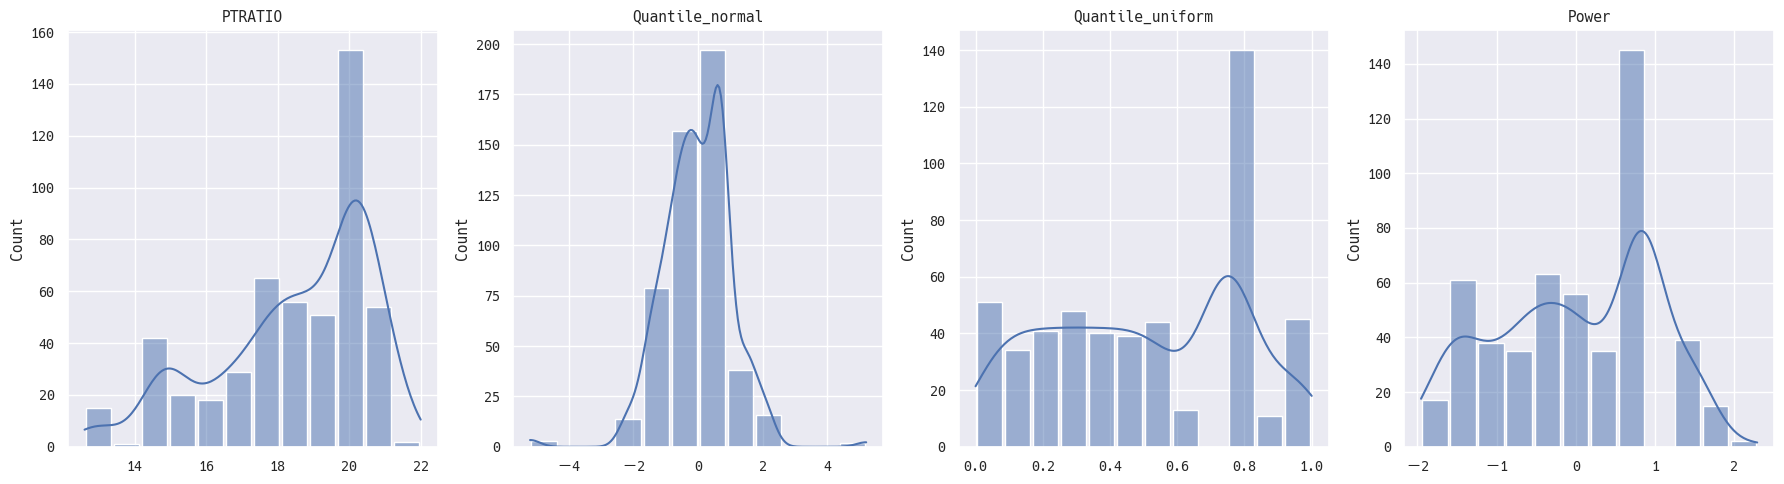

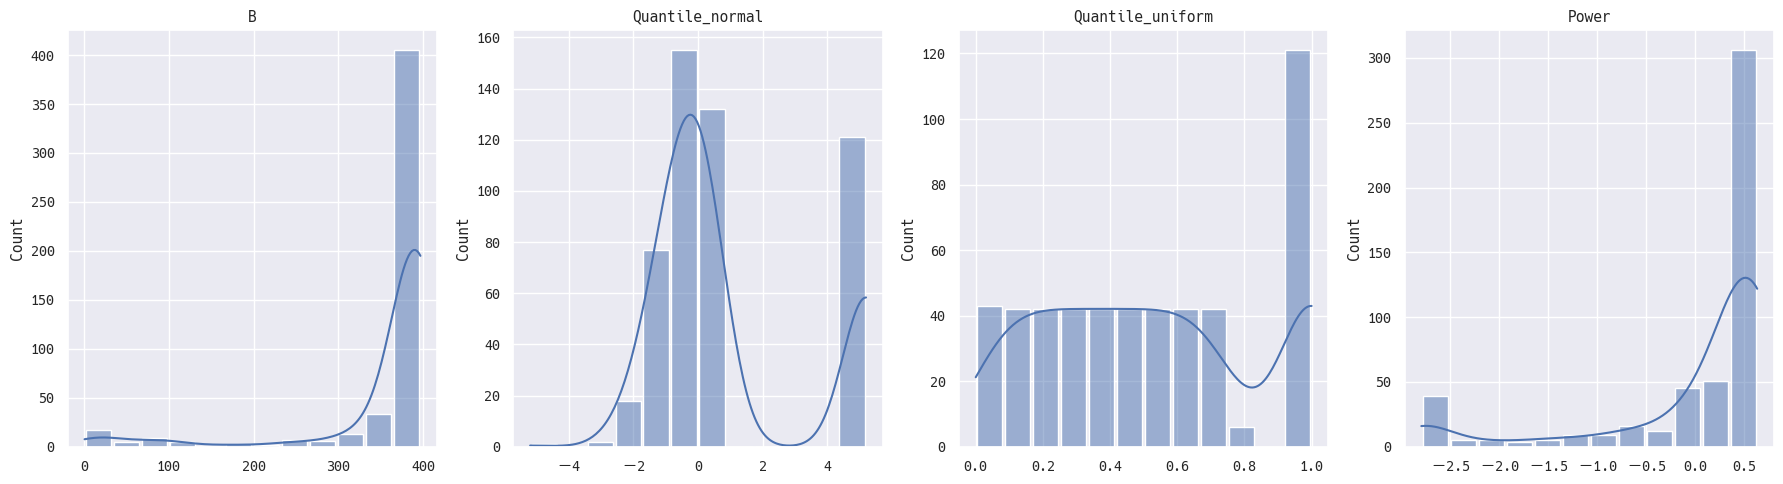

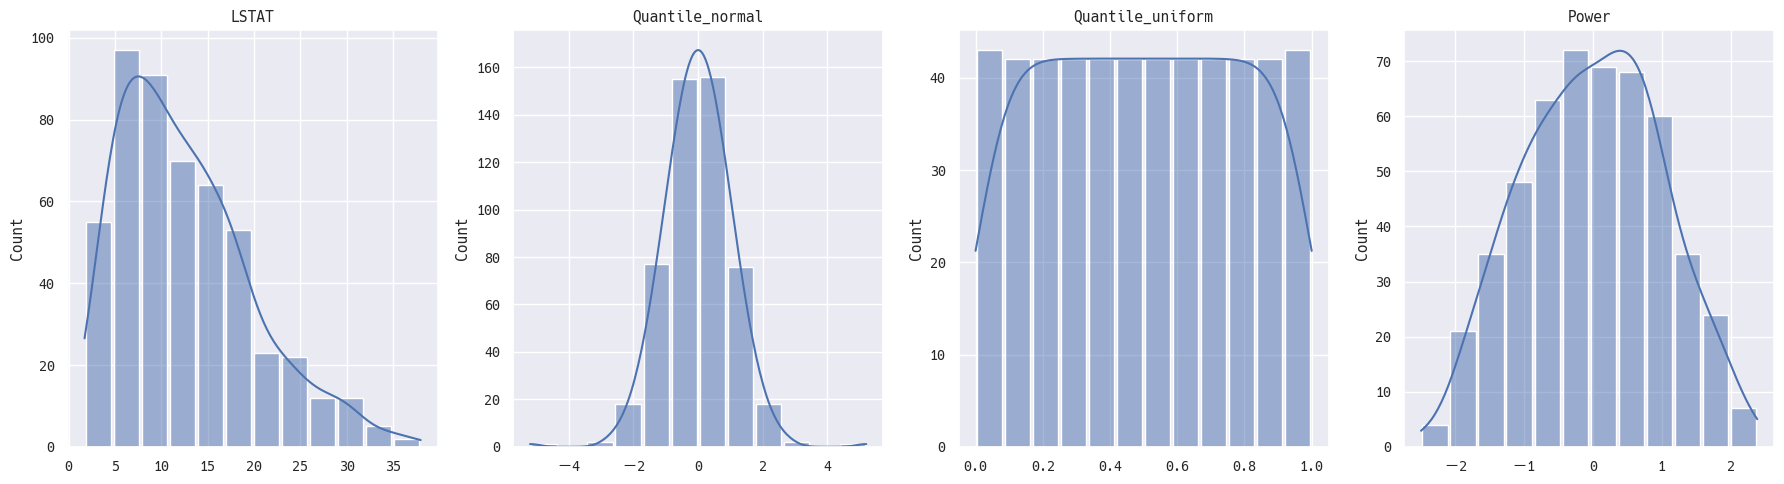

In [47]:
for feature in df.columns:
    plots_transformed(feature)

# パラメトリック、ノンパラメトリック
# 変換が可能な分布とそうでない分布がある

---
<a id=3></a>
[Topへ](#0)

---
## 3. ビニング、離散化

* KBinsDiscretizer  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
* pd.cut()

KBinsDiscretizer  
Keyword Arguments : n_bins=5, strategy='quantile'('uniform', 'kmeans'),  encode='onehot'('onehot-dense', 'ordinal')

In [48]:
x = df[["RM"]].values
x.max(), x.min()

(8.78, 3.561)

In [49]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer_q = KBinsDiscretizer(n_bins=5, strategy="quantile", encode="ordinal")
discretizer_u = KBinsDiscretizer(n_bins=5, strategy="uniform", encode="ordinal")
# ordinalは0, 1, 2, ...のラベルを付ける

In [50]:
discretizer_q.fit(x)
discretizer_u.fit(x)

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [52]:
discretizer_q.transform(x)[:5]

array([[3.],
       [3.],
       [4.],
       [4.],
       [4.]])

In [53]:
np.quantile(x, [0, 0.2, 0.4, 0.6, 0.8, 1])

array([3.561, 5.837, 6.086, 6.376, 6.75 , 8.78 ])

In [54]:
# データの個数で分ける
discretizer_q.transform([[3.6], [5.9], [6.1], [6.4], [6.8]])

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [55]:
# defaultはonehot
discretizer_o = KBinsDiscretizer(n_bins=5, strategy="quantile", encode="onehot")

In [56]:
discretizer_o.fit_transform(x).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [57]:
# データの数値を同じ幅で分割し、クラス分けをする
discretizer_u.transform([[3.6], [4.7], [5.7], [6.7], [7.8]])

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

pd.cut()

In [58]:
# pd.cutでも同じようなことができる
# 自身でラベル名を指定できる
classes = pd.cut(
    x.flatten(),
    bins=[3.561, 5.837, 6.086, 6.376, 6.75, 8.78],
    labels=["very low", "low", "medium", "high", "very high"],
)
classes
# rightを含み、leftを含まない

['high', 'high', 'very high', 'very high', 'very high', ..., 'high', 'medium', 'very high', 'very high', 'low']
Length: 506
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

In [59]:
# Categorical
type(classes)

pandas.core.arrays.categorical.Categorical

In [60]:
classes.unique()
# NaNは最小値3.561のこと。binsの中で3.561以下は含まれないため、3.560などにする必要があることに注意

['high', 'very high', 'low', 'medium', 'very low', NaN]
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---